In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,802 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,749 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,065 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [46.4 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:1

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')# Load saved data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-received-signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


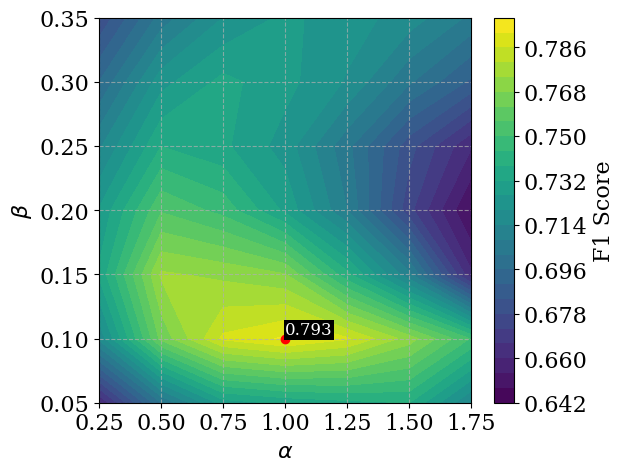

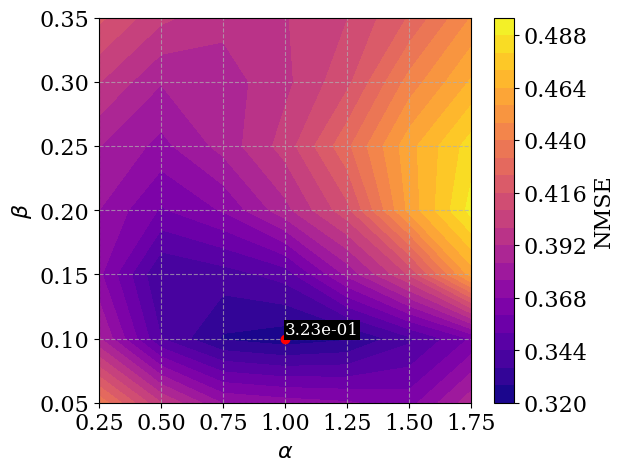

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# File paths (each file corresponds to a specific beta value while alpha varies)
file_paths = [
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-00-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-05-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-10-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-15-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-20-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-25-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-30-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-35-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-40-snr-db-12-pilot-length-25.npz",
]

# Initialize lists
beta_values = []
alpha_values = None
f1_values = []
nmse_values = []

# Load data from all files
for file_path in file_paths:
    data = np.load(file_path, allow_pickle=True)
    beta = data["beta"]
    alpha_array = data["alpha_array"]
    avg_f1 = data["avg_f1"]
    avg_nmse = data["avg_nmse"]

    beta_values.append(beta)
    if alpha_values is None:
        alpha_values = alpha_array  # Set alpha values once (assumed same for all)

    f1_values.append(avg_f1)
    nmse_values.append(avg_nmse)

# Convert lists to numpy arrays
beta_values = np.array(beta_values)
alpha_values = np.array(alpha_values)
f1_values = np.array(f1_values)
nmse_values = np.array(nmse_values)

# Create meshgrid
ALPHA, BETA = np.meshgrid(alpha_values, beta_values)

# Trim first and last row/col
ALPHA_trimmed = ALPHA[:, 1:-1][1:-1, :]
BETA_trimmed = BETA[:, 1:-1][1:-1, :]
f1_values_trimmed = f1_values[1:-1, 1:-1]
nmse_values_trimmed = nmse_values[1:-1, 1:-1]
alpha_values_trimmed = alpha_values[1:-1]
beta_values_trimmed = beta_values[1:-1]

# Set plot parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score Contour
plt.figure(figsize=(6, 5))
contour_f1 = plt.contourf(ALPHA_trimmed, BETA_trimmed, f1_values_trimmed, levels=25, cmap='viridis')
plt.colorbar(contour_f1, label='F1 Score')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.xticks(alpha_values_trimmed)
plt.yticks(beta_values_trimmed)
plt.grid(True)

# Highlight best F1 if inside trimmed area
max_f1 = np.max(f1_values)
max_f1_index = np.unravel_index(np.argmax(f1_values), f1_values.shape)
if 0 < max_f1_index[0] < len(beta_values) - 1 and 0 < max_f1_index[1] < len(alpha_values) - 1:
    max_f1_alpha = alpha_values[max_f1_index[1]]
    max_f1_beta = beta_values[max_f1_index[0]]
    plt.plot(max_f1_alpha, max_f1_beta, 'ro')
    plt.text(max_f1_alpha, max_f1_beta, f'{max_f1:.3f}', color='white',
             fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='black', edgecolor='none', pad=1))

plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Beta_F1_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot NMSE Contour
plt.figure(figsize=(6, 5))
contour_nmse = plt.contourf(ALPHA_trimmed, BETA_trimmed, nmse_values_trimmed, levels=25, cmap='plasma')
plt.colorbar(contour_nmse, label='NMSE')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.xticks(alpha_values_trimmed)
plt.yticks(beta_values_trimmed)
plt.grid(True)

# Highlight best NMSE if inside trimmed area
min_nmse = np.min(nmse_values)
min_nmse_index = np.unravel_index(np.argmin(nmse_values), nmse_values.shape)
if 0 < min_nmse_index[0] < len(beta_values) - 1 and 0 < min_nmse_index[1] < len(alpha_values) - 1:
    min_nmse_alpha = alpha_values[min_nmse_index[1]]
    min_nmse_beta = beta_values[min_nmse_index[0]]
    plt.plot(min_nmse_alpha, min_nmse_beta, 'ro')
    plt.text(min_nmse_alpha, min_nmse_beta, f'{min_nmse:.2e}', color='white',
             fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='black', edgecolor='none', pad=1))

plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Beta_NMSE_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

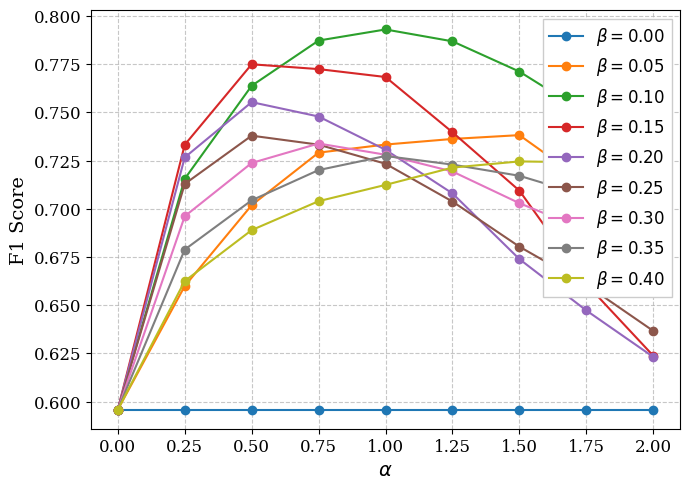

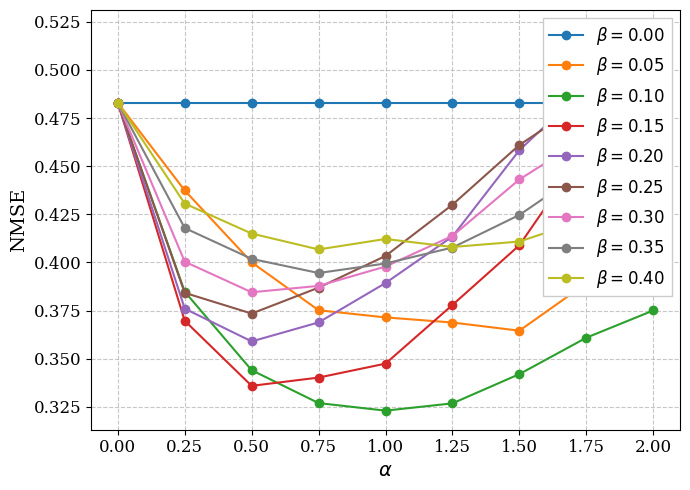

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set global plot parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Alpha vs F1 Score
plt.figure(figsize=(7, 5))
for i, beta in enumerate(beta_values):
    plt.plot(alpha_values, f1_values[i], marker='o', label=fr'$\beta={beta:.2f}$')

plt.xlabel(r'$\alpha$')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend(fontsize=12, loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_vs_F1_Score_All_Beta.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Alpha vs NMSE
plt.figure(figsize=(7, 5))
for i, beta in enumerate(beta_values):
    plt.plot(alpha_values, nmse_values[i], marker='o', label=fr'$\beta={beta:.2f}$')

plt.xlabel(r'$\alpha$')
plt.ylabel('NMSE')
plt.grid(True)
plt.legend(fontsize=12, loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_vs_NMSE_All_Beta.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


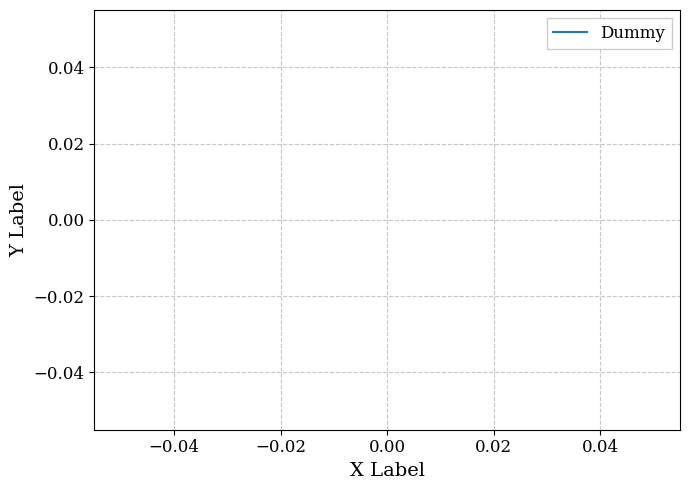

In [ ]:
import matplotlib.pyplot as plt

# Set LaTeX-style plot appearance
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Dummy plot
plt.figure(figsize=(7, 5))
plt.plot([], [], label='Dummy')
plt.xlabel(r'X Label')
plt.ylabel(r'Y Label')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/dummy.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

Results CA-SBL

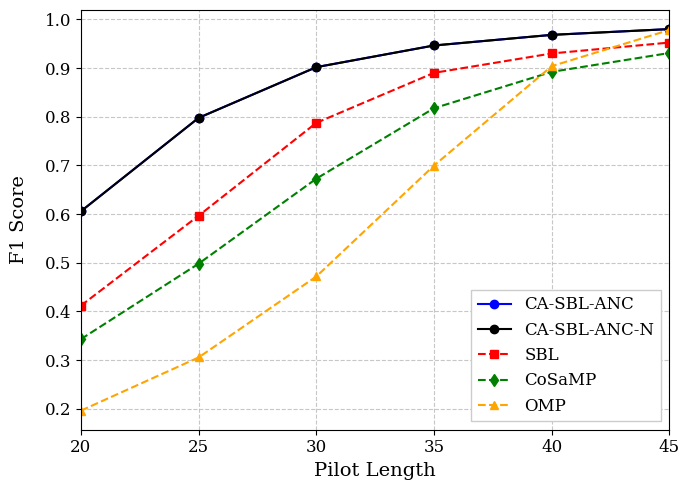

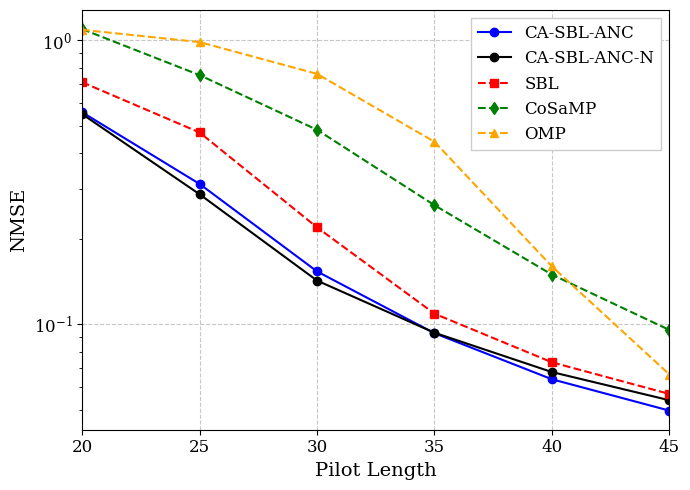

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_paths = {
    r'CA-SBL-ANC': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-1results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-all.npz",
    r'CA-SBL-ANC-N': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-all.npz",
    r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-sbl-snr-db-12-pilot-length-all.npz",
    r'CoSaMP': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-cosamp-snr-db-12-pilot-length-all.npz",
    r'OMP': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-omp-snr-db-12-pilot-length-all.npz",
}

# Unique plot styles: marker, color, line style
plot_styles = {
    r'CA-SBL-ANC': {'color': 'b',       'marker': 'o', 'linestyle': '-'},
    r'CA-SBL-ANC-N': {'color': 'k',       'marker': 'o', 'linestyle': '-'},
    r'SBL':        {'color': 'r',       'marker': 's', 'linestyle': '--'},
    r'CoSaMP':     {'color': 'g',       'marker': 'd', 'linestyle': '--'},
    r'OMP':        {'color': 'orange',  'marker': '^', 'linestyle': '--'},
}

# Metrics to extract
keys = ['avg_f1', 'avg_nmse']

datasets = {}
for label, path in file_paths.items():
    data = np.load(path, allow_pickle=True)
    datasets[label] = {key: data[key] for key in keys}

# Define pilot length values
pilot_length_values = pilot_length_array

# Update plot settings
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score vs Pilot Length
plt.figure(figsize=(7, 5))
for label in file_paths:
    style = plot_styles[label]
    plt.plot(
        pilot_length_values,
        datasets[label]['avg_f1'],
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label,
    )
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('F1 Score', labelpad=12)
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/F1_Score_vs_Pilot_Length.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# Plot NMSE vs Pilot Length
plt.figure(figsize=(7, 5))
for label in file_paths:
    style = plot_styles[label]
    plt.plot(
        pilot_length_values,
        datasets[label]['avg_nmse'],
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label,
    )
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/NMSE_vs_Pilot_Length.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

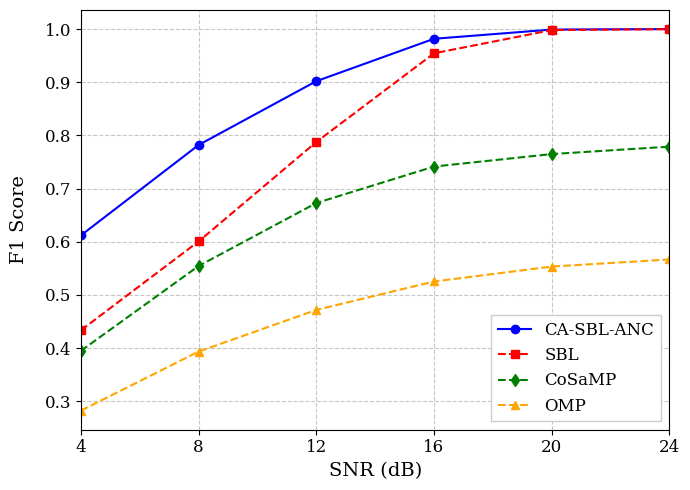

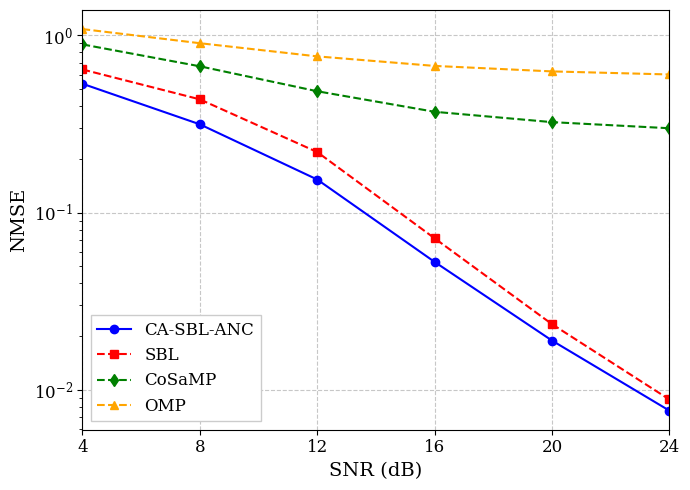

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_paths = {
    r'CA-SBL-ANC': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-all-pilot-length-30.npz",
    r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-sbl-snr-db-all-pilot-length-30.npz",
    r'CoSaMP': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-cosamp-snr-db-all-pilot-length-30.npz",
    r'OMP': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-omp-snr-db-all-pilot-length-30.npz",
}

# Unique plot styles: marker, color, line style
plot_styles = {
    r'CA-SBL-ANC': {'color': 'b',       'marker': 'o', 'linestyle': '-'},
    r'SBL':        {'color': 'r',       'marker': 's', 'linestyle': '--'},
    r'CoSaMP':     {'color': 'g',       'marker': 'd', 'linestyle': '--'},
    r'OMP':        {'color': 'orange',  'marker': '^', 'linestyle': '--'},
}

# Metrics to extract
keys = ['avg_f1', 'avg_nmse']

datasets = {}
for label, path in file_paths.items():
    data = np.load(path, allow_pickle=True)
    datasets[label] = {key: data[key] for key in keys}

# Define pilot length values
snr_db_values = snr_db_array

# Update plot settings
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score vs SNR
plt.figure(figsize=(7, 5))
for label in file_paths:
    style = plot_styles[label]
    plt.plot(
        snr_db_values,
        datasets[label]['avg_f1'],
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label,
    )
plt.xlim(min(snr_db_values), max(snr_db_values))
plt.xticks(snr_db_values)
plt.xlabel('SNR (dB)')
plt.ylabel('F1 Score', labelpad=12)
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/F1_Score_vs_SNR_DB.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# Plot NMSE vs SNR
plt.figure(figsize=(7, 5))
for label in file_paths:
    style = plot_styles[label]
    plt.plot(
        snr_db_values,
        datasets[label]['avg_nmse'],
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label,
    )
plt.xlim(min(snr_db_values), max(snr_db_values))
plt.xticks(snr_db_values)
plt.xlabel('SNR (dB)')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/NMSE_vs_SNR_DB.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

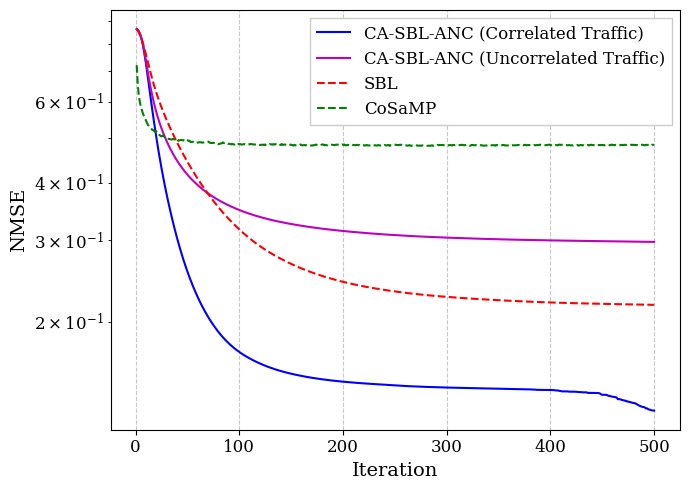

In [ ]:
# Define paths to convergence data
file_paths_convergence = {
    r'CA-SBL-ANC (Correlated Traffic)': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-30.npz",
    r'CA-SBL-ANC (Uncorrelated Traffic)': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-casbl-anc-uc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-30.npz",
    r'SBL':        "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-sbl-snr-db-12-pilot-length-30.npz",
    r'CoSaMP':     "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-cosamp-snr-db-12-pilot-length-30.npz",
    #r'OMP':        "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-omp-snr-db-12-pilot-length-30.npz",
}

# Update plot styles (reuse previous one)
plot_styles = {
    r'CA-SBL-ANC (Correlated Traffic)': {'color': 'b',       'marker': '', 'linestyle': '-'},
    r'CA-SBL-ANC (Uncorrelated Traffic)': {'color': 'm',       'marker': '', 'linestyle': '-'},
    r'SBL':        {'color': 'r',       'marker': '', 'linestyle': '--'},
    r'CoSaMP':     {'color': 'g',       'marker': '', 'linestyle': '--'},
    #r'OMP':        {'color': 'orange',  'marker': '', 'linestyle': '--'},
}

# Load convergence datasets
convergence_datasets = {}
for label, path in file_paths_convergence.items():
    data = np.load(path, allow_pickle=True)
    convergence_datasets[label] = data['nmse_iter_res']  # shape: [samples, iterations]

# Set global plot parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot convergence NMSE vs Iteration
plt.figure(figsize=(7, 5))
for label in convergence_datasets:
    style = plot_styles[label]
    nmse_matrix = convergence_datasets[label]
    avg_nmse = np.mean(nmse_matrix, axis=0)  # Average over all samples
    plt.plot(
        np.arange(1, len(avg_nmse)+1),
        avg_nmse,
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label
    )

plt.xlabel('Iteration')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/NMSE_Convergence_vs_Iteration.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

In [3]:
import numpy as np
import pandas as pd

# === Set file paths ===
file_path1 = "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-1results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-all-check.npz"
file_path2 = "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-all-check.npz"
file_path3 = "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-sbl-snr-db-12-pilot-length-all-check.npz"

# === Load .npz data ===
data1 = np.load(file_path1, allow_pickle=True)
data2 = np.load(file_path2, allow_pickle=True)
data3 = np.load(file_path3, allow_pickle=True)

# === Extract z_res and gamma_res ===
z1 = data1['z_res_o']
z2 = data2['z_res_o']
z3 = data3['z_res_o']
g1 = data1['gamma_res']
g2 = data2['gamma_res']
g3 = data3['gamma_res']

# === Select sample and pilot index ===
sample_index = 0
pilot_index = 0

z1_sample = z1[sample_index, pilot_index]
z2_sample = z2[sample_index, pilot_index]
z3_sample = z3[sample_index, pilot_index]
g1_sample = g1[sample_index, pilot_index]
g2_sample = g2[sample_index, pilot_index]
g3_sample = g3[sample_index, pilot_index]

N, M = z1_sample.shape  # N devices, M antennas

# === Build comparison table with z1 block → z2 block → z3 block ===
rows = []
for i in range(N):
    row = {
        "Device": i,
        "Gamma_1": int(g1_sample[i]),
        "Gamma_2": int(g2_sample[i]),
        "Gamma_3": int(g3_sample[i]),
    }

    # z1 block
    for j in range(M):
        row[f"z1_ant{j+1}"] = f"{z1_sample[i, j].real:.2f}+{z1_sample[i, j].imag:.2f}j"
    # z2 block
    for j in range(M):
        row[f"z2_ant{j+1}"] = f"{z2_sample[i, j].real:.2f}+{z2_sample[i, j].imag:.2f}j"
    # z3 block
    for j in range(M):
        row[f"z3_ant{j+1}"] = f"{z3_sample[i, j].real:.2f}+{z3_sample[i, j].imag:.2f}j"

    rows.append(row)

df = pd.DataFrame(rows)

# === Final column order ===
base_cols = ["Device", "Gamma_1", "Gamma_2", "Gamma_3"]
z1_cols = [f"z1_ant{j+1}" for j in range(M)]
z2_cols = [f"z2_ant{j+1}" for j in range(M)]
z3_cols = [f"z3_ant{j+1}" for j in range(M)]

df = df[base_cols + z1_cols + z2_cols + z3_cols]

# === Display ===
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
print(df.to_string(index=False))


 Device  Gamma_1  Gamma_2  Gamma_3      z1_ant1      z1_ant2      z1_ant3      z1_ant4      z2_ant1      z2_ant2      z2_ant3      z2_ant4      z3_ant1      z3_ant2      z3_ant3      z3_ant4
      0        0        0        0   0.00+0.00j   0.00+0.00j   0.00+0.00j   0.00+0.00j  0.00+-0.00j   0.00+0.00j -0.00+-0.00j  0.00+-0.00j   0.00+0.00j  0.00+-0.00j  0.00+-0.00j   0.00+0.00j
      1        0        0        0   0.00+0.00j   0.00+0.00j   0.00+0.00j   0.00+0.00j   0.00+0.00j   0.00+0.00j -0.00+-0.00j   0.00+0.00j  0.00+-0.00j   0.00+0.00j  -0.00+0.00j   0.00+0.01j
      2        0        0        0   0.00+0.00j   0.00+0.00j   0.00+0.00j   0.00+0.00j  0.00+-0.00j  0.00+-0.00j   0.00+0.00j -0.00+-0.00j   0.01+0.00j   0.00+0.00j   0.00+0.00j  0.00+-0.00j
      3        1        1        0  0.36+-0.05j  -0.31+0.04j  1.34+-0.09j  0.01+-0.11j  0.51+-0.07j  -0.36+0.09j  1.40+-0.29j  0.17+-0.01j  0.00+-0.00j -0.00+-0.00j  0.01+-0.00j  0.00+-0.00j
      4        0        0        0   0.00+0.0